In [2]:
from libdatasets import *
import librun
import libstop
from importlib import reload
from libadversarial import uncertainty_stop
from libstop import rank_stop_conds
from dotenv import load_dotenv; load_dotenv();

In [3]:
from libstop import no_ahead_tvregdiff
def plot_stop(plots, classifiers, stop_conditions, stop_results, scale='linear', figsize=(26, 4), lines=None):
    from librun import plot
    import matplotlib.pyplot as plt
    reload(libstop)
    from libstop import SSNCut
    figaxes = plot(plots, ret=True, sort=False, extra=1, scale=scale, figsize=figsize)
    for i, (fig, ax) in enumerate(figaxes):
        clfs = classifiers[i]
        config = plots[i][0]
        conf = config
        metrics = plots[i][1]
        prop_cycle = plt.rcParams['axes.prop_cycle']
        colors = prop_cycle.by_key()['color']
        
        X, y = getattr(libdatasets, conf.dataset_name)(None)
        _, X_unlabelled, _, Y_oracle, _, _ = active_split(
            X, y, labeled_size=conf.meta['labelled_size'], test_size=conf.meta['test_size'], random_state=check_random_state(0), ensure_y=conf.meta['ensure_y']
        )

        fscore_values = list(fscore(clfs[0], X_unlabelled, Y_oracle))
        ax[-1].plot(metrics[0].x, fscore_values)
        ax2 = ax[-1].twinx()
        fscore_grad = no_ahead_tvregdiff(fscore_values, 1, 1e-1, plotflag=False, diagflag=False)
        ax2.plot(metrics[0].x, fscore_grad)
        ax2.axhline(0, color='grey', ls='--')
        
        fig.legend()
        fig.tight_layout()


In [4]:
matrix = {
    # Dataset fetchers should cache if possible
    # Lambda wrapper required for function to be pickleable (sent to other threads via joblib)
    "datasets": [
        ("rcv1", wrap(rcv1, None)),
        ("webkb", wrap(webkb, None)),
        ("spamassassin", wrap(spamassassin, None)),
        ("avila", wrap(avila, None)),
        ("smartphone", wrap(smartphone, None)),
        ("swarm", wrap(swarm, None)),
        ("sensorless", wrap(sensorless, None)),
        ("splice", wrap(splice, None)),
        ("anuran", wrap(anuran, None)),
    ],
    "dataset_mutators": {
        "none": (lambda *x, **kwargs: x),
    },
    "methods": [
        ("uncertainty", partial(uncertainty_stop, n_instances=10)),
    ],
    "models": [
        "svm-linear"
    ],
    "meta": {
        "dataset_size": 1000,
        "labelled_size": 10,
        "test_size": 0.5,
        "n_runs": 10,
        "ret_classifiers": True,
        "ensure_y": True,
        "stop_info": True,
        "aggregate": False,
        "stop_function": ("len1000", lambda learner: learner.y_training.shape[0] >= 1000),
        "pool_subsample": 1000
    }
}

In [5]:
reload(librun)
results = librun.run(matrix, force_cache=True, fragment_run_start=0, fragment_run_end=1)
results_plots = [result[0] for result in results]
classifiers = [result[1] for result in results]
classifiers = [clf for clf in classifiers]

['C:\\Users\\Zac\\AppData\\Local\\pypoetry\\Cache\\virtualenvs\\research-KKf5lz0r-py3.8\\lib\\site-packages\\ipykernel_launcher.py', '-f', 'C:\\Users\\Zac\\AppData\\Roaming\\jupyter\\runtime\\kernel-94c0b8c4-ec41-44ea-85cc-bec52d148c0b.json']


Experiment:   0%|          | 0/9 [00:00<?, ?it/s]

In [6]:
import libactive; reload(libactive); import libdatasets; from libactive import active_split; from sklearn.utils import check_random_state; 

rcv1
webkb
spamassassin
avila
smartphone
swarm


KeyboardInterrupt: 

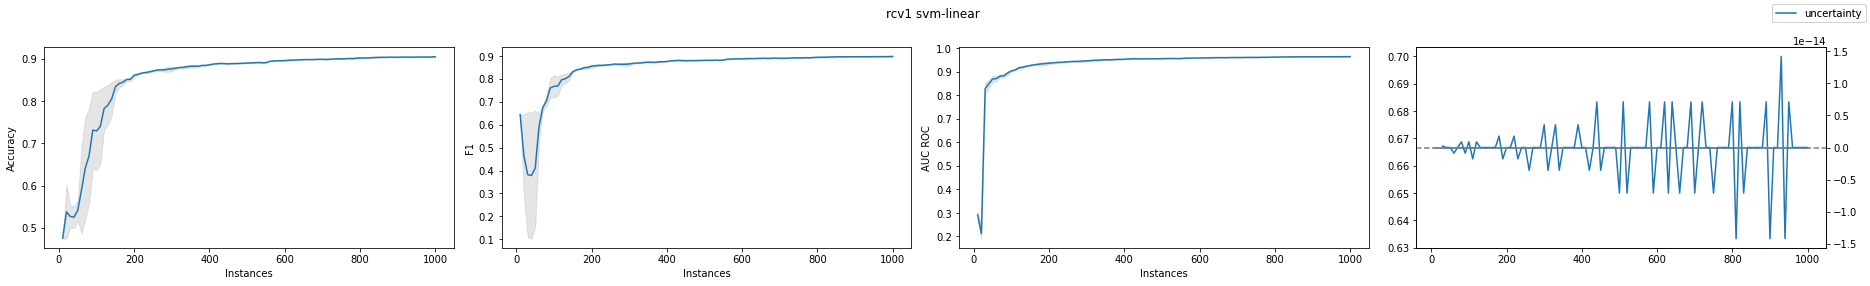

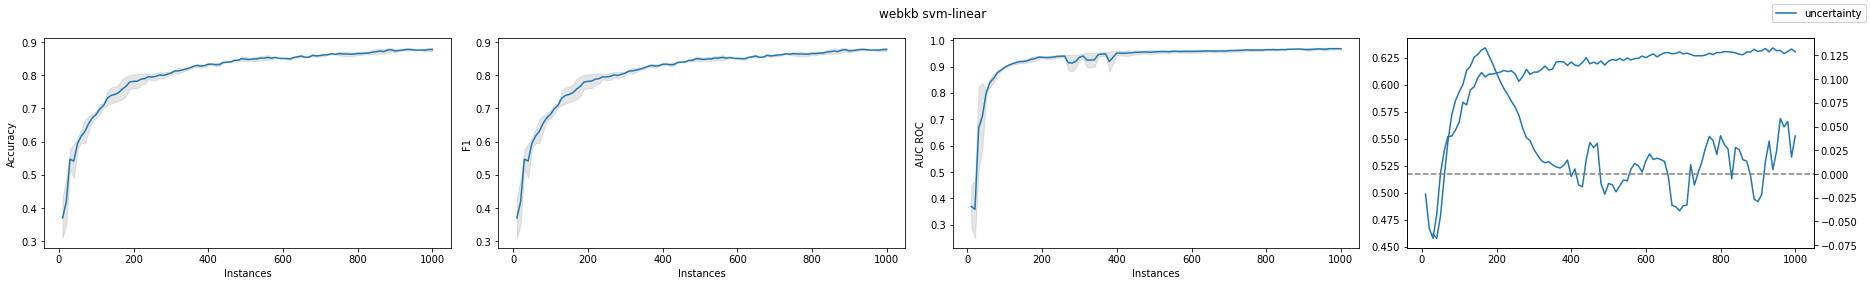

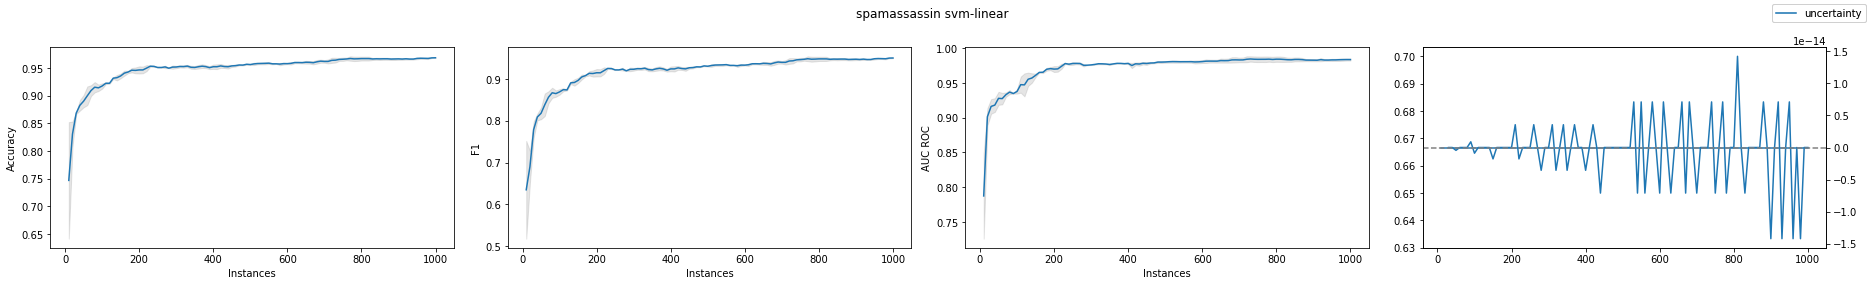

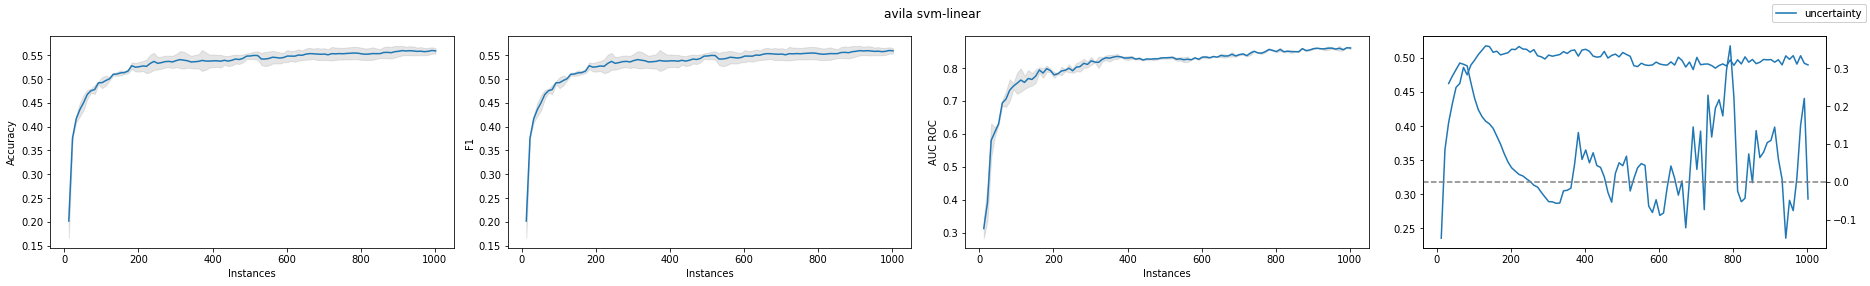

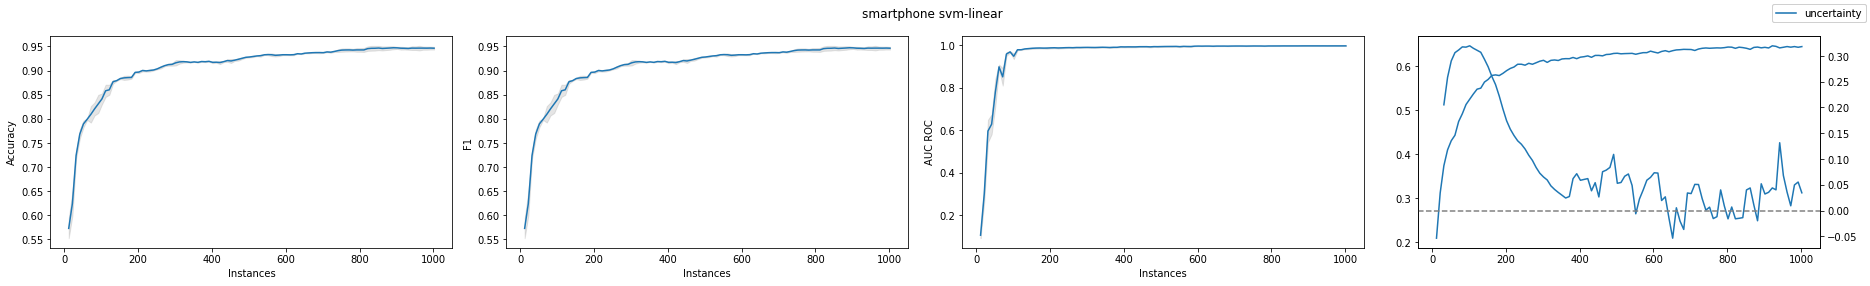

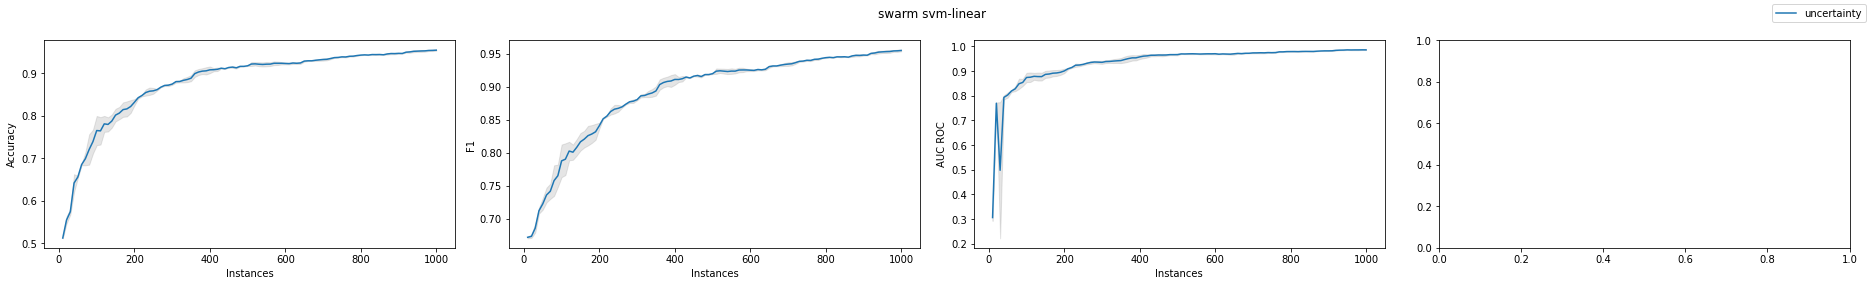

In [7]:
reload(libstop); from libstop import fscore
for plots, clfs in zip(results_plots, classifiers):
    print(plots[0].dataset_name)
    plot_stop([plots], [clfs], None, None)

rcv1
Reconstructing unlabelled pool
X_unlabelled shape (402197, 47236)
X_subsampled shape (1000, 47236)
<class 'numpy.ndarray'>
X_unlabelled shape (402187, 47236)
X_subsampled shape (1000, 47236)
<class 'numpy.ndarray'>
X_unlabelled shape (402177, 47236)
X_subsampled shape (1000, 47236)
<class 'numpy.ndarray'>
X_unlabelled shape (402167, 47236)
X_subsampled shape (1000, 47236)
<class 'numpy.ndarray'>
X_unlabelled shape (402157, 47236)
X_subsampled shape (1000, 47236)
<class 'numpy.ndarray'>
X_unlabelled shape (402147, 47236)
X_subsampled shape (1000, 47236)
<class 'numpy.ndarray'>
X_unlabelled shape (402137, 47236)
X_subsampled shape (1000, 47236)
<class 'numpy.ndarray'>
X_unlabelled shape (402127, 47236)
X_subsampled shape (1000, 47236)
<class 'numpy.ndarray'>
X_unlabelled shape (402117, 47236)
X_subsampled shape (1000, 47236)
<class 'numpy.ndarray'>
X_unlabelled shape (402107, 47236)
X_subsampled shape (1000, 47236)
<class 'numpy.ndarray'>
X_unlabelled shape (402097, 47236)
X_subsamp

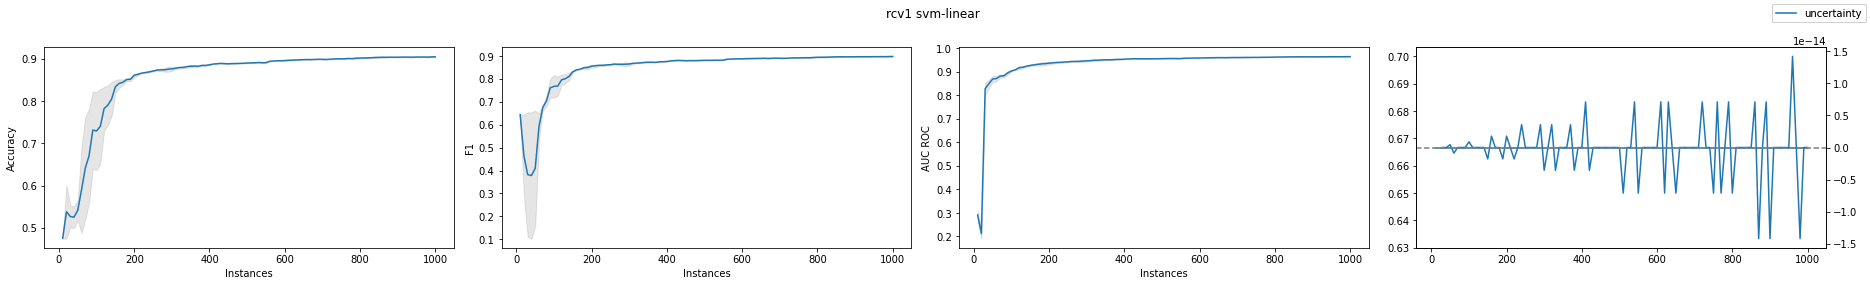

In [10]:
reload(libstop); from libstop import fscore
for plots, clfs in zip(results_plots, classifiers):
    if plots[0].dataset_name != 'rcv1':
        continue
    print(plots[0].dataset_name)
    plot_stop([plots], [clfs], None, None)